In [1]:
# Import image processing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import cluster
import time

In [2]:
# Auxiliar functions

def save_image(img, name):
    cv2.imwrite(name, img)

def plot_image(images, titles):
    counter = 1
    for image, title in zip(images, titles):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(int('1{}{}'.format(len(images), counter))), plt.imshow(image)
        plt.title(title), plt.axis('off')
        counter += 1
    plt.show()

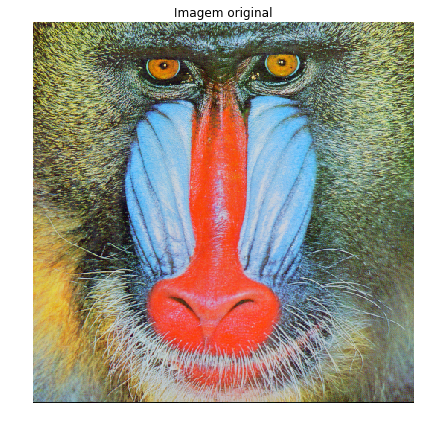

In [3]:
# Load the images and set the properly clors

IMAGE_FILE_1 = "images/baboon.png"

image = cv2.imread(IMAGE_FILE_1)

plt.rcParams["figure.figsize"] = (7,7)


plot_image([image], ["Imagem original"])

In [4]:
def kmeans(image, n_colors):
    (h, w, _) = image.shape
    image = image.reshape((h * w, -1))

    model = cluster.KMeans(n_clusters=n_colors)
    labels = model.fit_predict(image)
    centers = model.cluster_centers_.astype("uint8")
    quant = centers[labels]
    
    return centers, quant

def color_quantization(image, n_colors, rgb=False):
    (h, w, _) = image.shape
    
    if not rgb:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    centers, quant = kmeans(image, n_colors)
    new_image = quant.reshape((h, w, -1))
    
    if not rgb:
        new_image = cv2.cvtColor(new_image, cv2.COLOR_LAB2BGR)
    
    return new_image

Tempo gasto com imagem de 2 cores: 1.239464521408081s


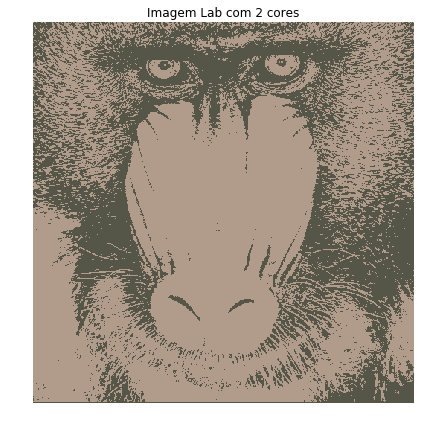

Tempo gasto com imagem de 4 cores: 6.150809049606323s


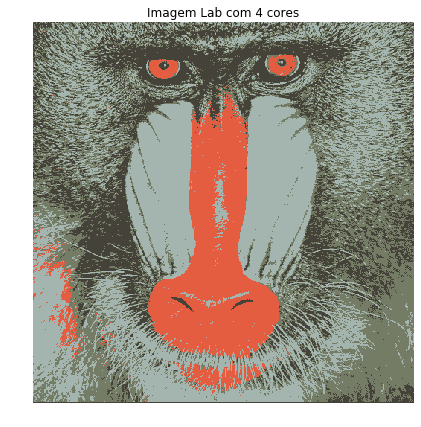

Tempo gasto com imagem de 8 cores: 13.44923186302185s


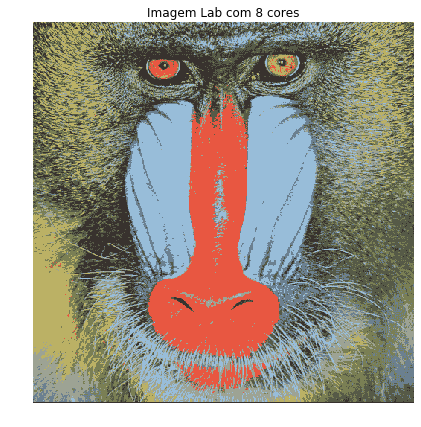

Tempo gasto com imagem de 16 cores: 57.229925870895386s


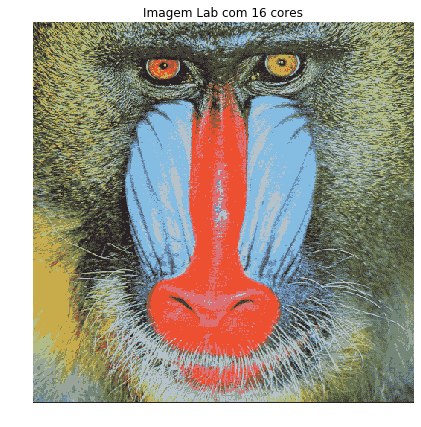

Tempo gasto com imagem de 32 cores: 147.09405207633972s


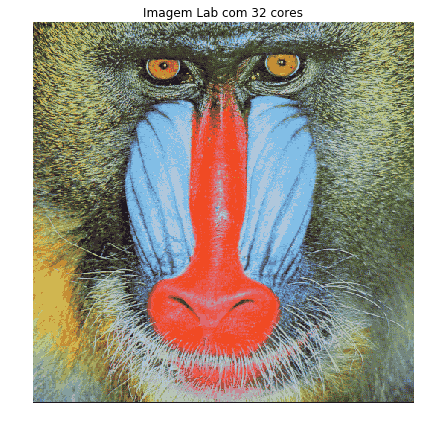

Tempo gasto com imagem de 64 cores: 397.2894837856293s


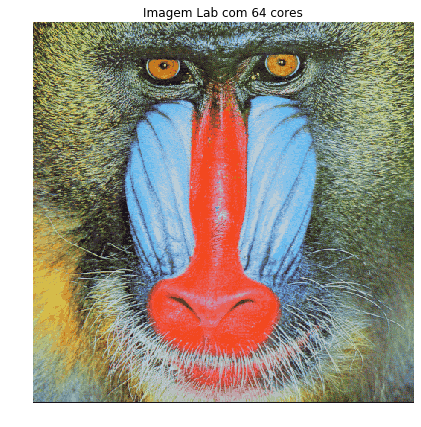

Tempo gasto com imagem de 128 cores: 1145.3813796043396s


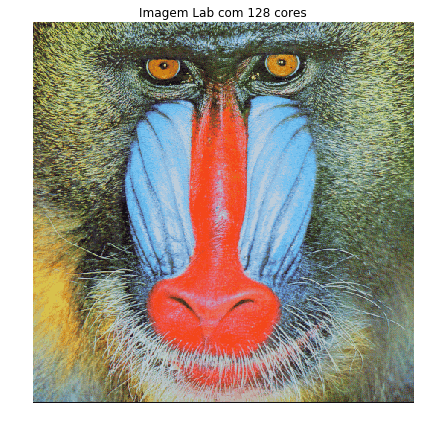

In [5]:
for i in range(1,8):
    n_colors = 2 ** i
    
    start_time = time.time()
    image_Lab = color_quantization(image, n_colors)
    elapsed_time = time.time() - start_time
    print('Tempo gasto com imagem de {} cores: {}s'.format(n_colors, elapsed_time))

    plt.rcParams["figure.figsize"] = (7,7)
    plot_image([image_Lab], ["Imagem Lab com {} cores".format(n_colors)])
    save_image(image_Lab, 'images/res{}.png'.format(n_colors))